# Titanic survivour prediction

## import libraries

In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [45]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [46]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [47]:
#survival:    Survival 
#PassengerId: Unique Id of a passenger. 
#pclass:    Ticket class     
#sex:    Sex     
#Age:    Age in years     
#sibsp:    # of siblings / spouses aboard the Titanic     
#parch:    # of parents / children aboard the Titanic     
#ticket:    Ticket number     
#fare:    Passenger fare     
#cabin:    Cabin number     
#mbarked:    Port of Embarkation

In [48]:
train.shape

(891, 12)

In [49]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [50]:
train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"O'Brien, Mr. Timothy",male,1601,B96 B98,S
freq,1,577,7,4,644


In [51]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [52]:
test.shape

(418, 11)

In [53]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [54]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [55]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [56]:
survived = train[train['Survived'] == 1]
not_survived = train[train['Survived'] == 0]

In [57]:
train.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [58]:
train.groupby('Pclass').Survived.value_counts()

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

In [59]:
train[['Pclass', 'Survived']].groupby('Pclass',as_index=False).Survived.mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

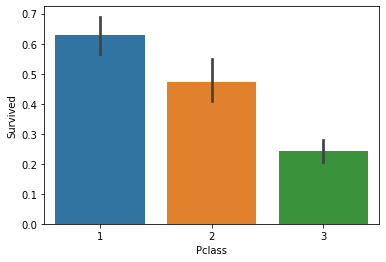

In [60]:
sns.barplot(x='Pclass', y='Survived', data=train)

In [61]:
train.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [62]:
train[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


<AxesSubplot:xlabel='Sex', ylabel='Survived'>

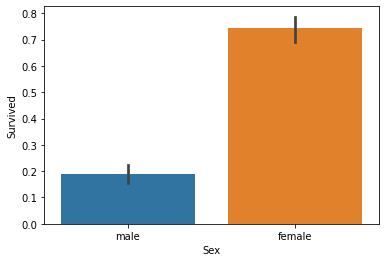

In [63]:
sns.barplot(x='Sex', y='Survived', data=train)

In [64]:
tab = pd.crosstab(train['Pclass'], train['Sex'])
print (tab)

Sex     female  male
Pclass              
1           94   122
2           76   108
3          144   347


Text(0, 0.5, 'Percentage')

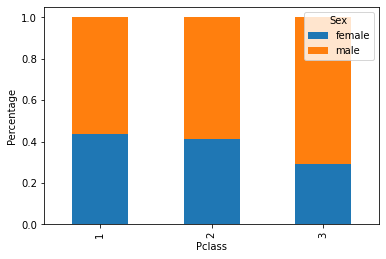

In [65]:
tab.div(tab.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('Pclass')
plt.ylabel('Percentage')

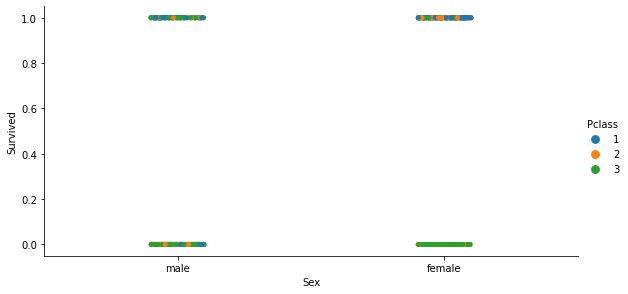

In [66]:
sns.catplot(x='Sex', y='Survived', hue='Pclass', height=4, aspect=2, data=train)

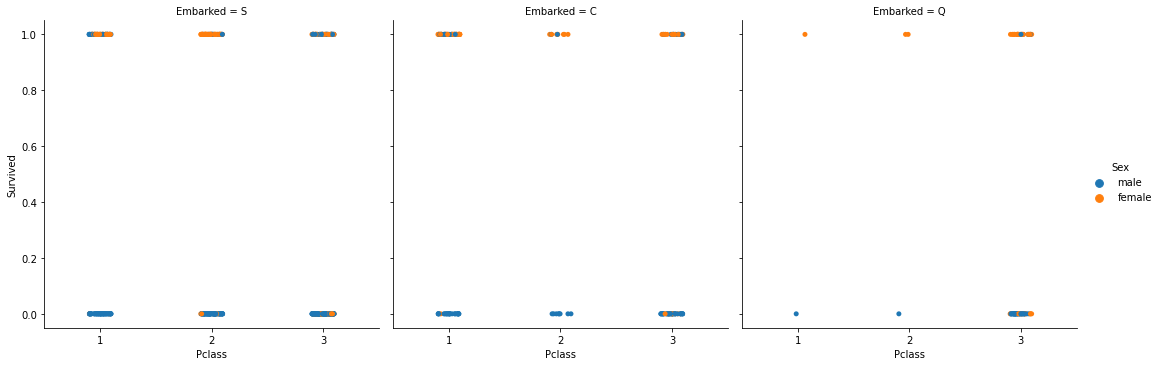

In [67]:
sns.catplot(x='Pclass', y='Survived', hue='Sex', col='Embarked', data=train)

In [68]:
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [69]:
train.groupby('Embarked').Survived.value_counts()

Embarked  Survived
C         1            93
          0            75
Q         0            47
          1            30
S         0           427
          1           217
Name: Survived, dtype: int64

In [70]:
train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean()

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

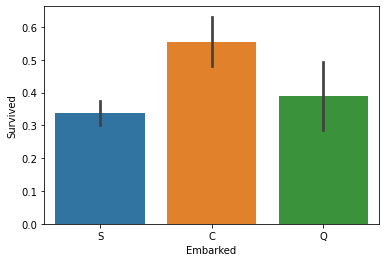

In [71]:
sns.barplot(x='Embarked', y='Survived', data=train)

In [72]:
train.Parch.value_counts()

0    678
1    118
2     80
3      5
5      5
4      4
6      1
Name: Parch, dtype: int64

In [73]:
train.groupby('Parch').Survived.value_counts()

Parch  Survived
0      0           445
       1           233
1      1            65
       0            53
2      0            40
       1            40
3      1             3
       0             2
4      0             4
5      0             4
       1             1
6      0             1
Name: Survived, dtype: int64

In [74]:
train[['Parch','Survived']].groupby('Parch',as_index=False).mean()

,Parch,Survived
0,0,0.343658
1,1,0.550847
2,2,0.500000
3,3,0.600000
4,4,0.000000
5,5,0.200000
6,6,0.000000


<AxesSubplot:xlabel='Parch', ylabel='Survived'>

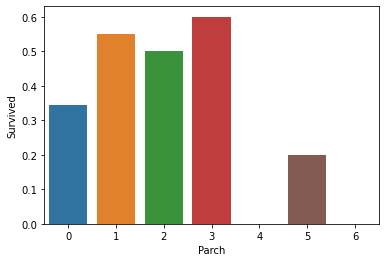

In [75]:
sns.barplot(x='Parch', y='Survived', ci=None, data=train)

In [76]:
train.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [77]:
train.groupby('SibSp').Survived.value_counts()

SibSp  Survived
0      0           398
       1           210
1      1           112
       0            97
2      0            15
       1            13
3      0            12
       1             4
4      0            15
       1             3
5      0             5
8      0             7
Name: Survived, dtype: int64

In [78]:
train[['SibSp','Survived']].groupby('SibSp',as_index=False).mean()

,SibSp,Survived
0,0,0.345395
1,1,0.535885
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


<AxesSubplot:xlabel='SibSp', ylabel='Survived'>

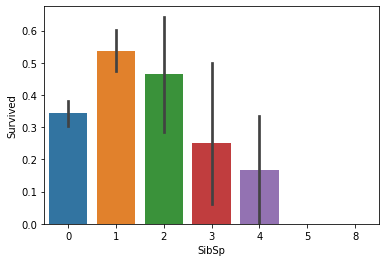

In [79]:
sns.barplot(x='SibSp',y='Survived',data=train)

In [80]:
train.Age.value_counts()

24.00    30
22.00    27
18.00    26
28.00    25
19.00    25
         ..
55.50     1
74.00     1
0.92      1
70.50     1
12.00     1
Name: Age, Length: 88, dtype: int64

In [81]:
train.groupby('Age').Survived.value_counts()

Age    Survived
0.42   1           1
0.67   1           1
0.75   1           2
0.83   1           2
0.92   1           1
                  ..
70.00  0           2
70.50  0           1
71.00  0           2
74.00  0           1
80.00  1           1
Name: Survived, Length: 142, dtype: int64

<AxesSubplot:xlabel='Age', ylabel='Survived'>

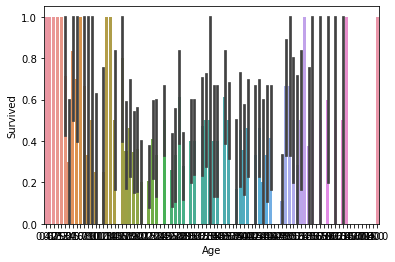

In [82]:
sns.barplot(x='Age',y='Survived',data=train)

<AxesSubplot:xlabel='Sex', ylabel='Age'>

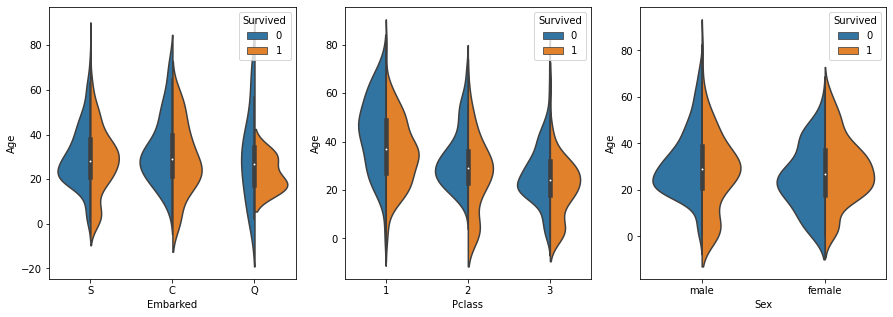

In [83]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)
sns.violinplot(x="Embarked", y="Age", hue="Survived", data=train, split=True, ax=ax1)
sns.violinplot(x="Pclass", y="Age", hue="Survived", data=train, split=True, ax=ax2)
sns.violinplot(x="Sex", y="Age", hue="Survived", data=train, split=True, ax=ax3)

In [84]:
titles=set()
for name in train['Name']:
    titles.add(name.split(',')[1].split('.')[0].strip(' '))
print(titles)  

{'Dr', 'Major', 'Mrs', 'the Countess', 'Capt', 'Ms', 'Master', 'Col', 'Rev', 'Miss', 'Don', 'Sir', 'Jonkheer', 'Mme', 'Lady', 'Mlle', 'Mr'}


In [87]:
title_dict={'Mrs':'Mrs','Major':'Other','Master':'Master','Lady':'Other','Mlle':'Miss','Dr':'Other','Col':'Other','Capt':'Other','Don':'Other','the Countess':'Other','Mme':'Mrs','Miss':'Miss','Jonkheer':'Other','Rev':'Other','Sir':'Other','Ms':'Miss','Mr':'Mr'}

In [88]:
train_test=[train,test]

In [90]:
for dataset in train_test:
    dataset['Title']=dataset['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip() )
    dataset['Title']=dataset.Title.map(title_dict)  

In [91]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [92]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S,Other
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C,Mr
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q,Mr


In [93]:
pd.crosstab(train['Title'],train['Sex'])

Sex,female,male
Title,,
Master,0,40
Miss,185,0
Mr,0,517
Mrs,126,0
Other,3,20


In [95]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Other": 5}

In [96]:
for dataset in train_test:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [97]:
df1=train.drop(['Name','Ticket','PassengerId','Cabin','Embarked'],axis=1)
df1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Title
0,0,3,male,22.0,1,0,7.2500,1
1,1,1,female,38.0,1,0,71.2833,3
2,1,3,female,26.0,0,0,7.9250,2
3,1,1,female,35.0,1,0,53.1000,3
4,0,3,male,35.0,0,0,8.0500,1


In [98]:
df1['Sex']=df1.Sex.map({'female':1,'male':0})

In [99]:
df1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Title
0,0,3,0,22.0,1,0,7.2500,1
1,1,1,1,38.0,1,0,71.2833,3
2,1,3,1,26.0,0,0,7.9250,2
3,1,1,1,35.0,1,0,53.1000,3
4,0,3,0,35.0,0,0,8.0500,1


In [100]:
df1.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Title         0
dtype: int64

In [101]:
mean_men=df1[df1['Sex']==0]['Age'].mean()
mean_fem=df1[df1['Sex']==1]['Age'].mean()
print (mean_men)

30.72664459161148


In [102]:
df1.loc[(df1.Age.isnull())&(df1['Sex']==1),'Age']=mean_fem
df1.loc[(df1.Age.isnull())&(df1['Sex']==0),'Age']=mean_men

In [103]:
df1.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Title       0
dtype: int64

In [104]:
df1.Age=(df1.Age-min(df1.Age))/(max(df1.Age)-min(df1.Age))
df1.Fare=(df1.Fare-min(df1.Fare))/(max(df1.Fare)-min(df1.Fare))

In [105]:
df1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Title
0,0,3,0,0.271174,1,0,0.014151,1
1,1,1,1,0.472229,1,0,0.139136,3
2,1,3,1,0.321438,0,0,0.015469,2
3,1,1,1,0.434531,1,0,0.103644,3
4,0,3,0,0.434531,0,0,0.015713,1


In [106]:
from sklearn.model_selection import train_test_split

In [107]:
x_train,x_test,y_train,y_test=train_test_split(df1.drop(['Survived'],axis=1),df1.Survived,test_size=0.25,random_state=0,stratify=df1.Survived)

## Logistic regression Classifier

In [108]:
from sklearn.linear_model import LogisticRegression 
clf= LogisticRegression()
clf.fit(x_train,y_train)

LogisticRegression()

In [109]:
from sklearn.metrics import accuracy_score
y_pred= clf.predict(x_test)
accuracy_score (y_test,y_pred)

0.8161434977578476

In [110]:
from sklearn.metrics import confusion_matrix
mat=confusion_matrix(y_test,y_pred)
mat

array([[124,  13],
       [ 28,  58]], dtype=int64)

<AxesSubplot:>

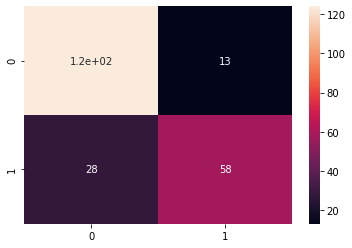

In [111]:
sns.heatmap(mat,annot=True)

In [112]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,1.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,3.0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,1.0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,1.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,3.0


In [113]:
df2=test.drop(['Name','Ticket','PassengerId','Cabin','Embarked'],axis=1)
df2.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Title
0,3,male,34.5,0,0,7.8292,1.0
1,3,female,47.0,1,0,7.0000,3.0
2,2,male,62.0,0,0,9.6875,1.0
3,3,male,27.0,0,0,8.6625,1.0
4,3,female,22.0,1,1,12.2875,3.0


In [114]:
df2['Sex']=df2.Sex.map({'male':0,'female':1})

In [115]:
df2.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Title
0,3,0,34.5,0,0,7.8292,1.0
1,3,1,47.0,1,0,7.0000,3.0
2,2,0,62.0,0,0,9.6875,1.0
3,3,0,27.0,0,0,8.6625,1.0
4,3,1,22.0,1,1,12.2875,3.0


In [116]:
df2.isnull().sum()

Pclass     0
Sex        0
Age       86
SibSp      0
Parch      0
Fare       1
Title      1
dtype: int64

In [117]:
Mean_fem=df2[df2['Sex']==1]['Age'].mean()
Mean_men=df2[df2['Sex']==0]['Age'].mean()

In [118]:
df2.loc[(df2.Age.isnull())&(df2['Sex']==1),'Age']=Mean_fem
df2.loc[(df2.Age.isnull())&(df2['Sex']==0),'Age']=Mean_men

In [119]:
df2.isnull().sum()

Pclass    0
Sex       0
Age       0
SibSp     0
Parch     0
Fare      1
Title     1
dtype: int64

In [120]:
df2[df2.Title.isnull()]

,Pclass,Sex,Age,SibSp,Parch,Fare,Title
414,1,1,39.0,0,0,108.9,NaN


In [121]:
df2['Title']=df2.Title.fillna(3) 

In [122]:
df2.isnull().sum()

Pclass    0
Sex       0
Age       0
SibSp     0
Parch     0
Fare      1
Title     0
dtype: int64

In [123]:
df2['Fare']=df2.Fare.fillna(df2.Fare.median())

In [124]:
df2.isnull().sum()

Pclass    0
Sex       0
Age       0
SibSp     0
Parch     0
Fare      0
Title     0
dtype: int64

In [125]:
df2.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Title
0,3,0,34.5,0,0,7.8292,1.0
1,3,1,47.0,1,0,7.0000,3.0
2,2,0,62.0,0,0,9.6875,1.0
3,3,0,27.0,0,0,8.6625,1.0
4,3,1,22.0,1,1,12.2875,3.0


In [126]:
df2['Age']=(df2.Age-min(df2.Age))/(max(df2.Age)-min(df2.Age))

In [127]:
df2['Fare']=(df2.Fare-min(df2.Fare))/(max(df2.Fare)-min(df2.Fare))

In [128]:
df2.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Title
0,3,0,0.452723,0,0,0.015282,1.0
1,3,1,0.617566,1,0,0.013663,3.0
2,2,0,0.815377,0,0,0.018909,1.0
3,3,0,0.353818,0,0,0.016908,1.0
4,3,1,0.287881,1,1,0.023984,3.0


In [129]:
pred = clf.predict(df2)

In [130]:
pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [131]:
submit=pd.DataFrame({'PassengerId':test['PassengerId'],'Survived':pred})
submit.to_csv('submit.csv',index=False)

In [132]:
pred_df=pd.read_csv('submit.csv')

<AxesSubplot:xlabel='Survived', ylabel='count'>

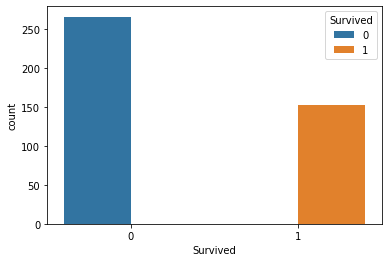

In [133]:
sns.countplot(x='Survived',hue='Survived',data=pred_df)

In [134]:
import seaborn as sns
%matplotlib inline


<AxesSubplot:>

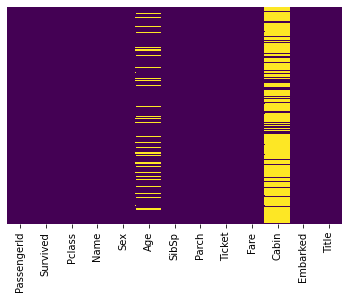

In [135]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [136]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [137]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

In [138]:
train['Embarked'] = train['Embarked'].fillna('S')

<AxesSubplot:>

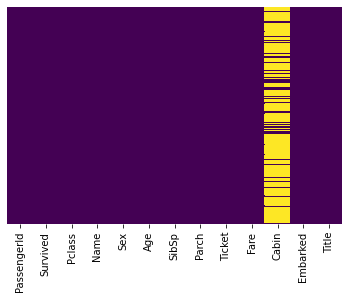

In [139]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [140]:
train.drop('Cabin',axis=1,inplace=True)

In [141]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1


In [17]:
train.dropna(inplace=True)

In [142]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
 11  Title        891 non-null    int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 83.7+ KB


In [143]:
sex = pd.get_dummies(train['Sex'],drop_first=True)
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [144]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [145]:
train = pd.concat([train,sex,embark],axis=1)

In [146]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Title,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,1,0,1
1,2,1,1,38.0,1,0,71.2833,3,0,0,0
2,3,1,3,26.0,0,0,7.9250,2,0,0,1
3,4,1,1,35.0,1,0,53.1000,3,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,1,0,1


## Decision Tree Classifier

In [147]:
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split


In [148]:
X_train, X_test, y_train, y_test = train_test_split(train.drop(['Survived'],axis=1), 
                                                    train['Survived'], test_size=0.10, 
                                                    random_state=101)

In [149]:
dt_model=DecisionTreeClassifier()
dt_model.fit(X_train,y_train)

DecisionTreeClassifier()

In [150]:
dt_pred = dt_model.predict(X_test)

In [151]:
print(confusion_matrix(y_test,dt_pred))

[[46  5]
 [16 23]]


In [152]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,dt_pred))

              precision    recall  f1-score   support

           0       0.74      0.90      0.81        51
           1       0.82      0.59      0.69        39

    accuracy                           0.77        90
   macro avg       0.78      0.75      0.75        90
weighted avg       0.78      0.77      0.76        90



## random forest classifier

In [153]:
from sklearn.ensemble import RandomForestClassifier

In [154]:
rf= RandomForestClassifier(n_estimators=500)
rf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=500)

In [155]:
rf_pre=rf.predict(X_test)

In [156]:
print(confusion_matrix(y_test,rf_pre))

[[47  4]
 [14 25]]


In [157]:
print(classification_report(y_test,rf_pre))

              precision    recall  f1-score   support

           0       0.77      0.92      0.84        51
           1       0.86      0.64      0.74        39

    accuracy                           0.80        90
   macro avg       0.82      0.78      0.79        90
weighted avg       0.81      0.80      0.79        90

